In [2]:
from outliers_sklearn_knn import deviations as dataset
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

Working with data_BM01P1_hits.parquet


In [3]:
means = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = means.fit_predict(np.array(dataset).reshape(-1, 1))

In [4]:
print(clusters := means.cluster_centers_)

[[0.03655534]
 [0.81490584]]


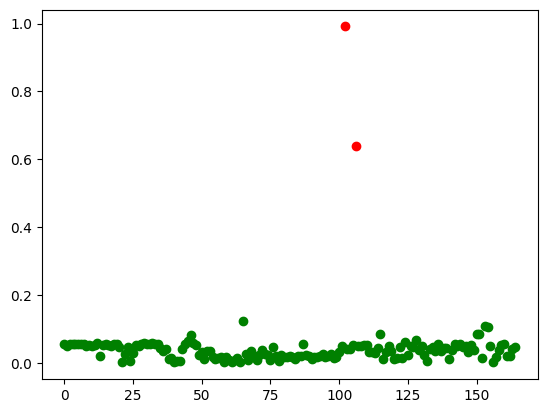

In [5]:
# linked to n_clusters=2 will not work otherwise
color_map = {0: 'green', 1: 'red'}

outliers = []

for idx, (data, label) in enumerate(zip(dataset, labels)):
    plt.scatter(idx, data, color=color_map[label])
    if color_map[label] == 'red':
        outliers.append(idx)

In [6]:
decision_boundary = (clusters[1]-clusters[0])/2 

outliers_cycle = {}

n_epochs = 1

while decision_boundary > 1:
    data_wo_outliers = {}
    for idx, (pt, label) in enumerate(zip(dataset, labels)):
        if label == 0:
            data_wo_outliers[idx] = pt
        elif not pt in outliers_cycle.values():
            outliers_cycle[idx] = pt

    data_wo_outliers_list = list(data_wo_outliers.values())

    means = KMeans(n_clusters=2, init='k-means++', random_state=42)
    labels = means.fit_predict(np.array(data_wo_outliers_list).reshape(-1, 1))
    
    clusters = means.cluster_centers_
    decision_boundary = (clusters[1]-clusters[0])/2 
    n_epochs += 1

print(f"Script executed in {n_epochs} epochs")
dataset_np = np.array([x for x in dataset])

outs = [dataset.index(outlier) for outlier in dataset_np[dataset > decision_boundary]]
print(f"Outliers: {outs}")



Script executed in 1 epochs
Outliers: [102, 106]


C:\Users\hrdyj\AppData\Local\Temp\ipykernel_13408\1361171263.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(len(dataset)), dataset, **style.scatter_style)


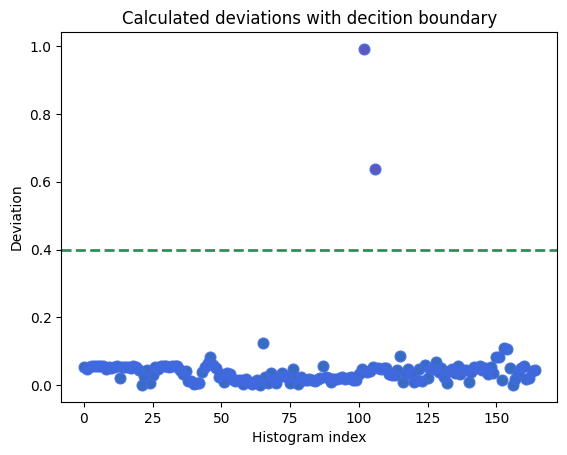

In [8]:
import plotting_styles as style
for idx, pt in enumerate(dataset):
    if pt >= decision_boundary:
        plt.scatter(idx, pt, color='red')        
    else:
        plt.scatter(idx, pt, color='green')        

plt.scatter(range(len(dataset)), dataset, **style.scatter_style)
plt.axhline(y=0.4, color='seagreen', linestyle='--', linewidth=1.95)
plt.title("Calculated deviations with decition boundary")
plt.xlabel("Histogram index")
plt.ylabel("Deviation")
plt.show()